# Datasets for Regression 

In this notebook, we illustrate several simple datasets to illustrate computational techniques.

References:

Kaggle
https://www.kaggle.com/datasets

UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets.html

Scikit-learn already includes several standard datasets
http://scikit-learn.org/stable/datasets/

Movielens is a famous dataset for movie recommendation
http://grouplens.org/datasets/movielens/

Turkish Statistics Association also publishes some interesting datasets
http://www.tuik.gov.tr

A Handbook of Small Data Sets
edited by D.J. Hand, F. Daly, A.D. Lunn, K.J. McConway and E. Ostrowski 
from Chapman and Hall, ISBN 0 412 39920 2.
https://www.stat.ncsu.edu/research/sas/sicl/data/


In [2]:
import numpy as np
import pandas as pd

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_kaza = pd.read_csv(u'data/kaza.csv',sep=';')
df_enerji = pd.read_csv(u'data/enerji.csv',sep=';')
df_iris = pd.read_csv(u'data/iris.txt',sep=' ')
df_welllog = pd.read_csv(u'data/well-log.csv',names=['y'])

## <a src="data/arac.csv">Number of vehicles in Turkey over the last 50 years</a> 
(from http://www.tuik.gov.tr/UstMenu.do?metod=temelist)

In [3]:
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452.0,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383.0,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326.0,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324.0,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195.0,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474.0,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887.0,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789.0,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561.0,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157.0,NaN


## Visualization

We show each time series $x_t$ as a plot. Here, $t = 1966, \dots, 2015$.

It is also useful to visualize to get a feel of the proportional chance over time $$r_t = \log \frac{x_t}{x_{t-1}}$$

When displaying several plots, it is important to match the scales inorder not to miss relevant structure

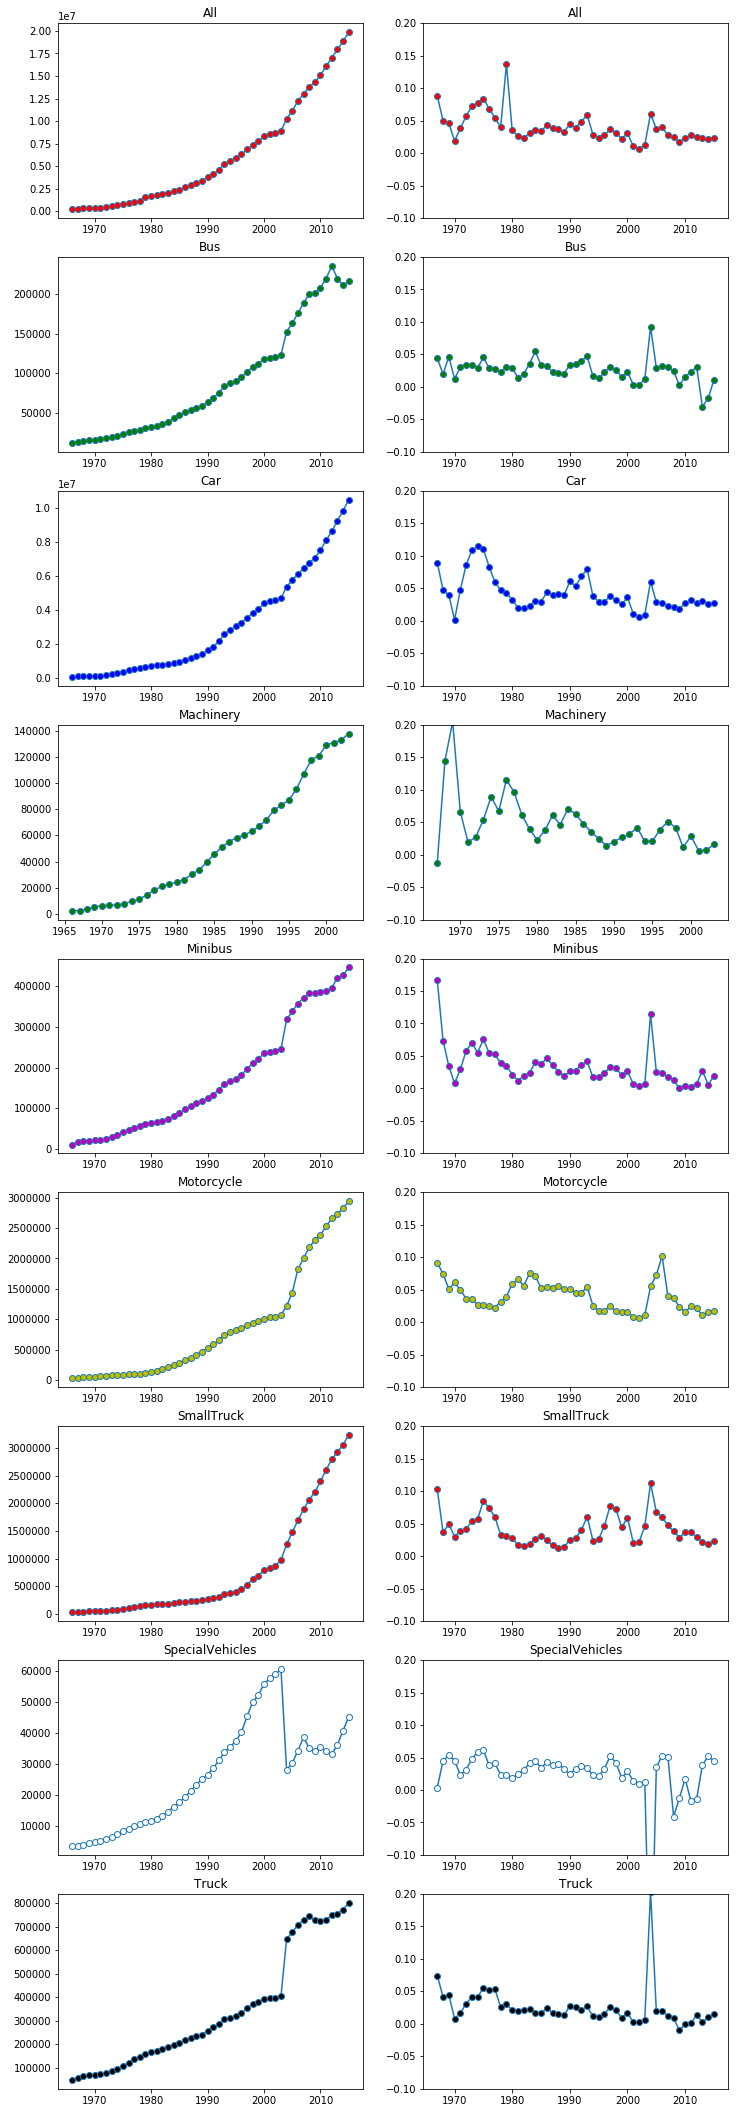

In [4]:

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

df_arac = pd.read_csv(u'data/arac.csv',sep=';')

df = df_arac

cols = {'All':'r', 'Bus':'g', 'Car':'b', 'Minibus': 'm', 'Motorcycle':'y', 'SmallTruck':'r', 'Truck':'k', 'SpecialVehicles':'w', 'Machinery':'g'}
N = len(cols.keys())

i = 0
plt.figure(figsize=(12,38))
for v in sorted(cols.keys()):
    i += 1
    plt.subplot(N,2,i)
    plt.plot(df['Year'],df[v],'o-',markerfacecolor=cols[v])
    #if i != 1:
    #    plt.ylim([0,1E7])
    plt.title(v)
    
    # Log ratio
    lr = np.log10(df[v]) - np.log10(df[v].shift(1))
    i += 1
    plt.subplot(N,2,i)
    plt.plot(df['Year'],lr,'o-',markerfacecolor=cols[v])
    plt.ylim([-0.1,0.2])
    plt.title(v)
    
plt.show()



## <a src="data/kaza.csv">Number of Accidents and Losses</a>

In [5]:
df_kaza

,Year,NumberOfAccidents,MaterialLossOnly,PersonalInjury,PersonsKilled,PersonsInjured
0,2002,439777,374029,65748,4093,116412
1,2003,455637,388606,67031,3946,118214
2,2004,537352,460344,77008,4427,136437
3,2005,620789,533516,87273,4505,154086
4,2006,728755,632627,96128,4633,169080
5,2007,825561,718567,106994,5007,189057
6,2008,950120,845908,104212,4236,184468
7,2009,1053346,942225,111121,4324,201380
8,2010,1106201,989397,116804,4045,211496
9,2011,1228928,1097083,131845,3835,238074


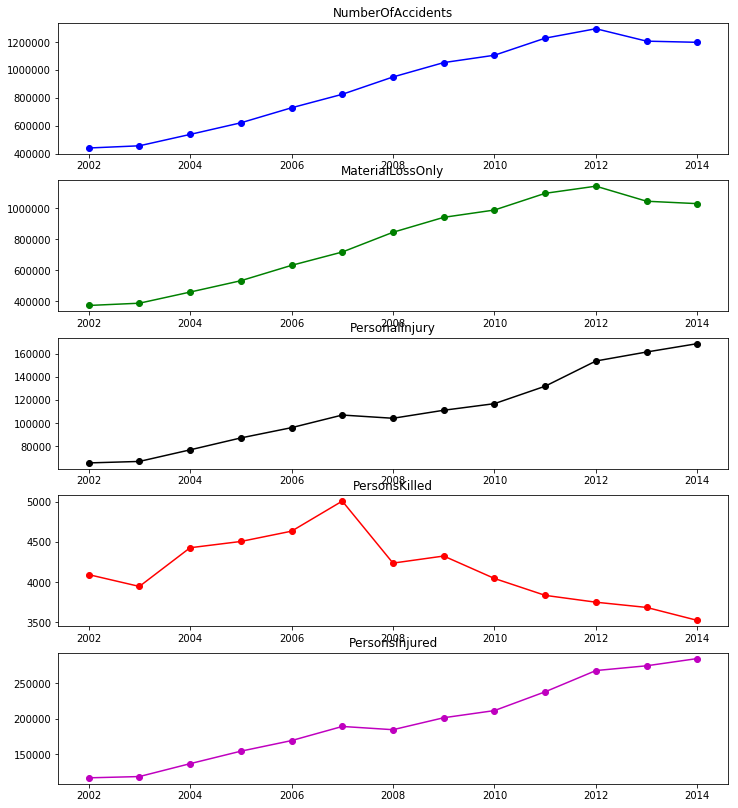

In [6]:
cols = {'NumberOfAccidents': 'b', 'MaterialLossOnly':'g', 'PersonalInjury':'k', 'PersonsKilled':'r', 'PersonsInjured':'m'}

x = df_kaza['Year']
#y = df_kaza['PersonsInjured']
#y = df_kaza['PersonsKilled']
N = len(cols.keys())

plt.figure(figsize=(12,14))
i = 0
for v in cols.keys():
    i += 1
    plt.subplot(N,1,i)
    y = df_kaza[v]
    plt.plot(x ,y ,cols[v]+'o-', markerfacecolor=cols[v])
    plt.title(v)
    
plt.show()



## <a src="data/enerji.csv">Energy Consumption in Turkey</a>

This data set contains the total energy consumption in GigaWatts and its distribution over different sectors

In [7]:
df_enerji

,Year,Total,Household,Commercial,Government,Industrial,Illumination,Other
0,1970,7307.80000,15.899450,4.774351,4.129834,64.173896,2.641014,8.381455
1,1971,8289.30000,16.263134,4.567334,4.130626,64.478303,2.412749,8.147853
2,1972,9527.30000,16.087454,4.676036,3.815352,64.999528,2.183200,8.238431
3,1973,10530.10000,14.793782,4.299104,3.517535,67.287110,2.059809,8.042659
4,1974,11358.70000,15.157544,5.075405,3.828783,66.720663,1.957971,7.259634
5,1975,13491.70000,17.485565,4.887449,3.675593,64.819852,1.857438,7.274102
6,1976,16078.90000,17.549708,4.653303,3.455460,65.334693,1.591527,7.415308
7,1977,17968.80000,17.701794,4.988090,3.086461,66.688371,1.418013,6.117270
8,1978,18933.80000,18.901647,4.878577,3.172105,65.523561,1.460879,6.063231
9,1979,19633.10000,20.140477,5.725535,3.168119,63.858993,1.479644,5.627232


Index(['Year', 'Total', 'Household', 'Commercial', 'Government', 'Industrial',
       'Illumination', 'Other'],
      dtype='object')


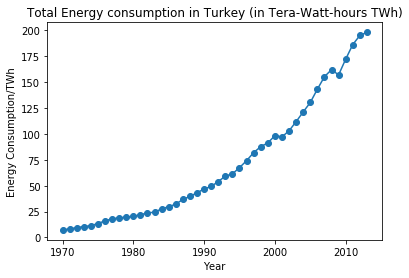

In [8]:
print(df_enerji.columns)


x = df_enerji.Year
y = df_enerji.Total/1000
plt.plot(x, y, 'o-')
plt.title('Total Energy consumption in Turkey (in Tera-Watt-hours TWh)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption/TWh')
plt.show()




# Classification

## <a src="data/iris.txt">Iris Dataset</a>

Famous data set from (Fisher, 1926)

|Class 1 | Class 2 | Class 3 | ? | ? |
|-------------|
| Iris Setosa | Iris Versicolour | Iris Virginica | ? | ? |
| <img src="data/iris1.png" width="200"> </img> | <img src="data/iris2.png" width="200"> </img> | <img src="data/iris3.png" width="200"> </img> | <img src="data/versi1.jpeg" width="200"> | <img src="data/versi2.jpeg" width="200">  </img>  

__Features__
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

<img src="data/564px-Petal-sepal.jpg" width="200"> </img>



In [9]:
df_iris

,sl,sw,pl,pw,c
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


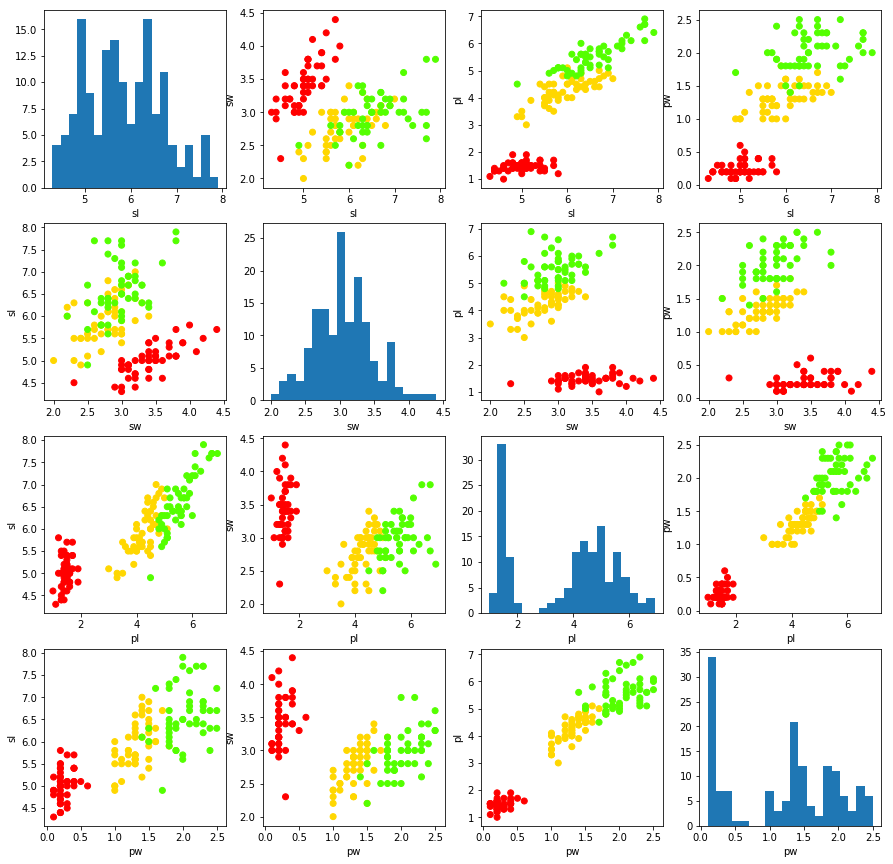

In [10]:
from itertools import product 

keys = ['sl','sw','pl','pw']

i = 0
N = len(keys)

plt.figure(figsize=(15,15))

for v,w in product(keys, keys):
    i+=1
    plt.subplot(N,N,i)
    if v == w:
        plt.hist(df_iris[v],bins=20)
        plt.xlabel(v)
    else:
        plt.scatter(df_iris[v],df_iris[w],c=df_iris['c'],cmap='prism')
        plt.xlabel(v)
        plt.ylabel(w)
        
plt.show()


## MNIST Digits

http://scikit-learn.org/stable/datasets/

Scikit-learn has a set of utilities for loading standard datasets used in Machine Learning.

In [ ]:
from matplotlib.pylab import plt
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

N = 8
M = 8
plt.figure(figsize=(14,14))

i = 0
for v,w in product(range(N), range(M)):
    i+=1
    plt.subplot(M,N,i)
    plt.imshow(mnist.data[10000+5000*v+20*w].reshape(28,28),cmap='gray_r',interpolation='nearest')

plt.show()

# Recommendation

http://grouplens.org/datasets/movielens/

## MovieLens 100K

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-100k/u.data', sep='\t', header=None, names=rnames)
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [2]:
NRows = max(ratings['user_id'])
NCols = max(ratings['movie_id'])


X = np.nan*np.ones((NRows, NCols))

for k in range(len(ratings)):
    i = ratings['user_id'].loc[k]-1
    j = ratings['movie_id'].loc[k]-1
    r = ratings['rating'].loc[k]
    X[i,j] = r

print(NRows, NCols)

943 1682


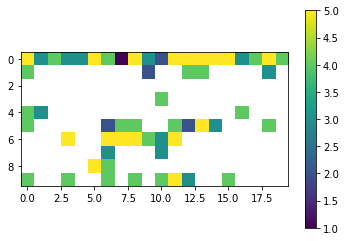

In [19]:
plt.imshow(X[0:10,0:20], interpolation='nearest')
plt.colorbar()
plt.show()

## MovieLens 1M



In [20]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')


In [21]:
#users

ratings
#movies

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [22]:

f = open('movie_lens1M.txt', 'w');

nnz = len(ratings)
nrows = max(ratings['user_id'])
ncols = max(ratings['movie_id'])
print(2)
print(nrows, ncols)
print(nnz)
s = '2\n'+str(nrows)+" "+str(ncols)+"\n"+str(nnz)+"\n"
f.write(s)

for i in range(nnz):
    a = ratings.iloc[i]
    s = str(a['user_id']-1) + " " + str(a['movie_id']-1) + " " + str(a['rating']) + '\n'
    f.write(s)


f.close()

2
6040 3952
1000209


# Text Analysis

Read the main figures from Hamlet

In [23]:
import re

MAXLINES = 10000
f = open('/Users/cemgil/src/ipynb/notes/data/books-eng/hamlet.txt')

i = 0
words = []

for l in f:
    i+=1
    #    print(l,end='')
    if i>MAXLINES: break
    for w in re.split('(\W+)',l):
        if w.isalpha():
            words.append(w)
    
        
f.close()

Counts = dict()

for w in words:
    if w in Counts:
        Counts[w] += 1
    else:
        Counts[w] = 1
        
for w in sorted(Counts.keys()):
    if w.isupper() and len(w)>1:
        print(w, Counts[w])

for w in words:
    if w.isupper() and len(w)>1:
        print(w)


BERNARDO 26
CLAUDIUS 105
CORNELIUS 6
FORTINBRAS 5
FRANCISCO 10
GERTRUDE 76
GHOST 1
GUILDENSTERN 54
HAMLET 355
HORATIO 118
KING 104
LAERTES 54
LORD 86
LUCIANUS 3
MARCELLUS 41
MARGARET 1
OPHELIA 68
OSRIC 19
POLONIUS 114
PRINCE 2
QUEEN 76
REYNALDO 16
ROSENCRANTZ 70
VOLTIMAND 7
CLAUDIUS
HAMLET
POLONIUS
HORATIO
LAERTES
LUCIANUS
VOLTIMAND
CORNELIUS
ROSENCRANTZ
GUILDENSTERN
OSRIC
MARCELLUS
BERNARDO
FRANCISCO
REYNALDO
FORTINBRAS
GERTRUDE
OPHELIA
FRANCISCO
BERNARDO
BERNARDO
FRANCISCO
BERNARDO
FRANCISCO
BERNARDO
FRANCISCO
BERNARDO
FRANCISCO
BERNARDO
FRANCISCO
BERNARDO
FRANCISCO
HORATIO
MARCELLUS
HORATIO
MARCELLUS
FRANCISCO
MARCELLUS
FRANCISCO
MARCELLUS
BERNARDO
HORATIO
BERNARDO
MARCELLUS
BERNARDO
MARCELLUS
HORATIO
BERNARDO
HORATIO
BERNARDO
MARCELLUS
BERNARDO
MARCELLUS
BERNARDO
HORATIO
BERNARDO
MARCELLUS
HORATIO
MARCELLUS
BERNARDO
HORATIO
MARCELLUS
BERNARDO
HORATIO
MARCELLUS
HORATIO
MARCELLUS
HORATIO
MARCELLUS
HORATIO
BERNARDO
HORATIO
MARCELLUS
HORATIO
BERNARDO
HORATIO
MARCELLUS
BERNARDO
HORATIO


# Anomaly detection and changepoint

## Well-log data

### http://mldata.org/repository/data/viewslug/well-log/

Consists of 4050 nuclear magnetic resonance measurements taken from drill while drilling a well



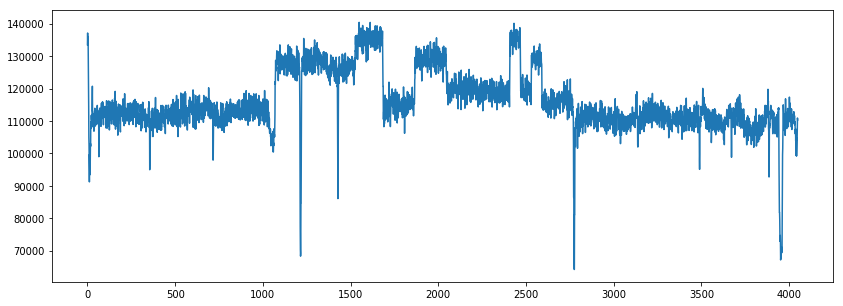

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt

plt.figure(figsize=(14,5))
df_welllog = pd.read_csv(u'data/well-log.csv',names=['y'])
plt.plot(df_welllog.y)
plt.show()

## Wind Turbine Data

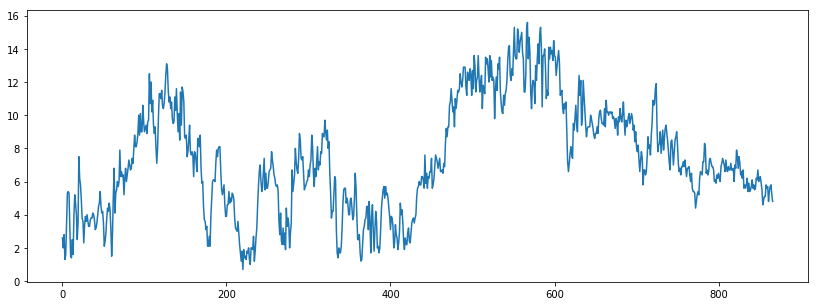

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd

plt.figure(figsize=(14,5))
df_windturbine = pd.read_csv(u'data/wind_turbine.csv')
plt.plot(df_windturbine.wind_speed)
plt.show()

Since one of the dimensions corresponds to an angle, it is natural to visualize the data using a radar plot.

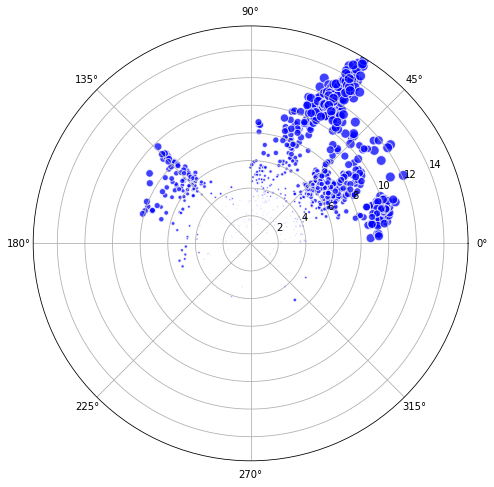

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
r = df_windturbine['wind_speed']
theta = 2 * np.pi * df_windturbine['wind_direction']/360.
area = 100 * np.abs(df_windturbine['production'])/df_windturbine['production'].max()
#colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, alpha=0.9, s=area, color='b', edgecolor='w')
c.set_alpha(0.75)

plt.show()

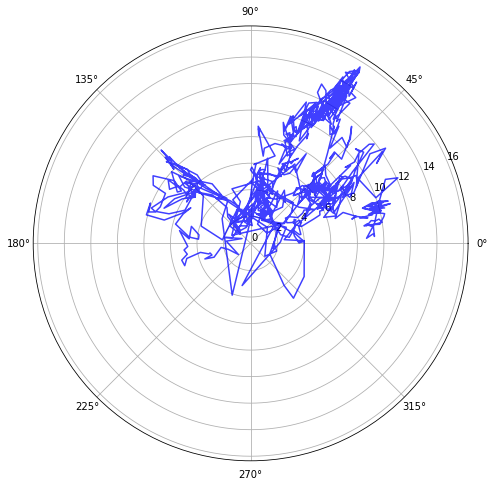

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
r = df_windturbine['wind_speed']
theta = 2 * np.pi * df_windturbine['wind_direction']/360.
area = 100 * np.abs(df_windturbine['production'])/df_windturbine['production'].max()
#colors = theta

ax = plt.subplot(111, projection='polar')
c, = ax.plot(theta, r, alpha=0.9, color='b')
c.set_alpha(0.75)

plt.show()

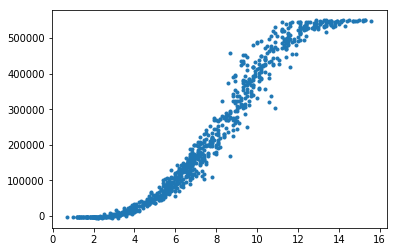

In [4]:
plt.plot(df_windturbine['wind_speed'], df_windturbine['production'],'.')
plt.show()

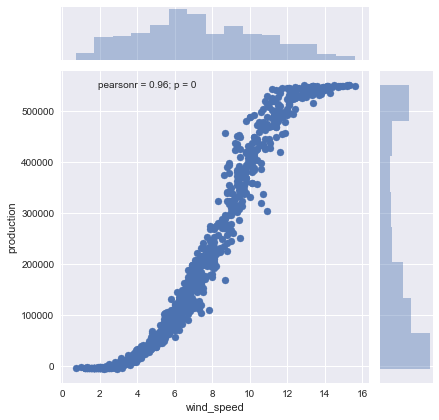

In [25]:
# Seaborn is another visualization library
import seaborn as sns
sns.set(color_codes=True)

plt.figure(figsize=(5,5))
df = pd.read_csv(u'data/wind_turbine.csv')
sns.jointplot(x="wind_speed", y="production", data=df);
plt.show()


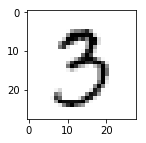

## UCI

https://archive.ics.uci.edu/ml/datasets.html

### Demand Prediction



In [6]:
from __future__ import print_function, division
import pandas as pd

df = pd.read_csv("data/Daily_Demand_Forecasting_Orders.csv", delimiter=';')

df


,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577
1,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675
2,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412
3,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120
4,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517
5,2,4,110925,96360,30792,50704,125868,79,52042,8773,47522,24966,207364
6,2,5,144124,118919,43304,66371,153368,0,46573,33597,48269,20973,263043
7,2,6,119379,113870,38584,85961,124413,15709,35033,26278,56665,18502,248958
8,3,2,218856,124381,33973,148274,162044,1054,66612,19461,103376,10458,344291
9,3,3,146518,101045,36399,43306,168723,865,58224,7742,82395,11948,248428


In [7]:
df.loc[0]

Week of the month (first week, second, third, fourth or fifth week         1
Day of the week (Monday to Friday)                                         4
Non-urgent order                                                      316307
Urgent order                                                          223270
Order type A                                                           61543
Order type B                                                          175586
Order type C                                                          302448
Fiscal sector orders                                                       0
Orders from the traffic controller sector                              65556
Banking orders (1)                                                     44914
Banking orders (2)                                                    188411
Banking orders (3)                                                     14793
Target (Total orders)                                                 539577

The data fields are quite complicated so it is better to organize data as a tensor.

In [8]:
df.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

* 'Non-urgent order' $+$ 'Urgent order' is almost equal to 'Target (Total orders)'

* 'Order type A' $+$ 'Order type B' $+$ 'Order type C' = 'Target (Total orders)'

* Data is better visualized if organized in weeks and day-of-week

* u'Fiscal sector orders', u'Orders from the traffic controller sector', u'Banking orders (1)', u'Banking orders (2)', u'Banking orders (3)' sum to about $60$ percent of 'Target (Total orders)'

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc


Total orders series, when viewed as a time series is hard to interpret.

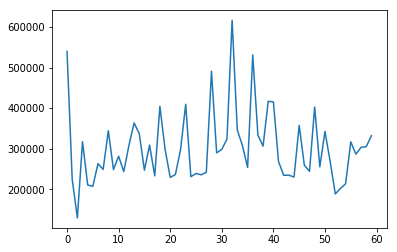

In [10]:
x = df['Target (Total orders)']
plt.plot(x)
plt.show()

Arrange the data by week and day of week 

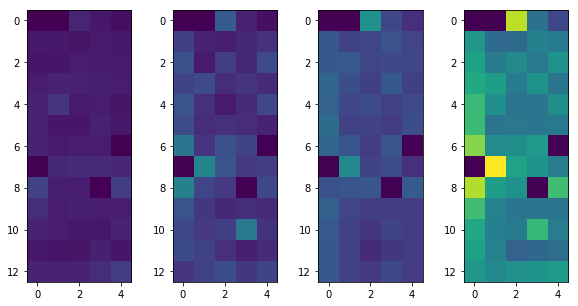

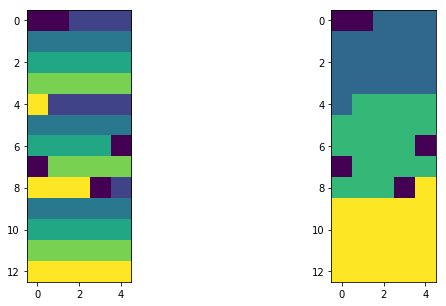

In [11]:


t1 = df['Week of the month (first week, second, third, fourth or fifth week']
t2 = df['Day of the week (Monday to Friday)']

z = [df[col] for col in ['Order type A','Order type B','Order type C','Target (Total orders)']]; vmax = 600000
#z = [df[col] for col in [u'Non-urgent order', u'Urgent order','Target (Total orders)']]
#z = [df[col] for col in [u'Fiscal sector orders', u'Orders from the traffic controller sector', u'Banking orders (1)', u'Banking orders (2)', u'Banking orders (3)']]
X = np.zeros([13,5, len(z)])

# Day and week features
F = np.zeros([13, 5, 2])

m = 0
w = 0
t1_prev = 6
t2_prev = 7
for i in range(len(t1)):
    if t1_prev>t1[i]:
        m = m+1
    if t2_prev>t2[i]:
        w = w+1
    t1_prev = t1[i]
    t2_prev = t2[i]
    
    row_idx = w-1
    col_idx = t2[i]-2
    
    for j in range(len(z)):
        X[row_idx, col_idx, j] = z[j][i]

    F[row_idx, col_idx, 0] = t1[i]
    F[row_idx, col_idx, 1] = m
    

plt.figure(figsize=(10,5))
for j in range(len(z)):
    plt.subplot(1,len(z),j+1)
    plt.imshow(X[:,:,j], vmax=vmax,vmin=0)
#    plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(F[:,:,0])
plt.subplot(1,2,2)
plt.imshow(F[:,:,1])


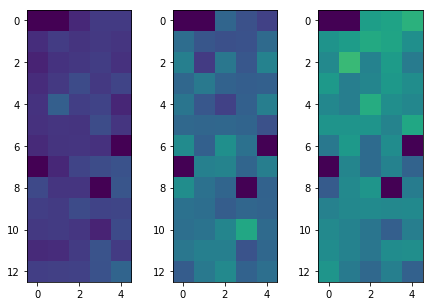

In [12]:
plt.figure(figsize=(10,5))
for j in range(len(z)-1):
    plt.subplot(1,len(z),j+1)
    plt.imshow(X[:,:,j]/(1+X[:,:,-1]), vmax=1,vmin=0)
#    plt.colorbar()
plt.show()


## Nips conference papers

https://archive.ics.uci.edu/ml/datasets/NIPS+Conference+Papers+1987-2015

## Sunspot data

http://www.sidc.be/silso/infosnytot

-------------------------------------------------------------------------------
CSV
-------------------------------------------------------------------------------
~~~
Filename: SN_y_tot_V2.0.csv
Format: Comma Separated values (adapted for import in spreadsheets)
The separator is the semicolon ';'.

Contents:
Column 1: Gregorian calendar year (mid-year date)
Column 2: Yearly mean total sunspot number.
Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
Column 4: Number of observations used to compute the yearly mean total sunspot number.
Column 5: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.
~~~

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function, division
import pandas as pd

df = pd.read_csv("data/sunspots.csv", delimiter=';', names=['Year','mean_Sunspots','mean_std','N','Provisional'])
df

,Year,mean_Sunspots,mean_std,N,Provisional
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1
5,1705.5,96.7,-1.0,-1,1
6,1706.5,48.3,-1.0,-1,1
7,1707.5,33.3,-1.0,-1,1
8,1708.5,16.7,-1.0,-1,1
9,1709.5,13.3,-1.0,-1,1


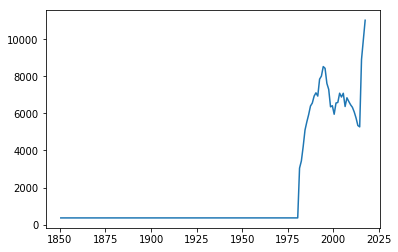

In [14]:
start = 150
plt.plot(df['Year'][start:],df['N'][start:])
plt.show()

In [15]:
%connect_info

{
  "shell_port": 51197,
  "iopub_port": 51198,
  "stdin_port": 51199,
  "control_port": 51200,
  "hb_port": 51201,
  "ip": "127.0.0.1",
  "key": "5f99ee29-5b6c2ecab90750c0df552698",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-9ff888c2-016d-4625-8341-97f073d6ee8b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
